In [1]:
import numpy as np
from numpy.linalg import svd, cholesky
from scipy.stats import norm
from math import sqrt, ceil
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, Arc
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10

legend_opts = {
    'fontsize':15,
    'frameon':True, 
    'framealpha':1,
    'facecolor':'white',
    'edgecolor':'black',
    'labelspacing':0.1}

def savefig(fig, filename, **kwargs):
    fig.savefig(f'../viz/{filename}', bbox_inches='tight', **kwargs)

/tmp/ipykernel_127/141511753.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Central Limit Theorem

Self-contained example of implementation

In [2]:
n_sums = 1000
n_additions = 100
rng = np.random.RandomState(seed=24)
uniform_matrix = rng.uniform(size=(n_additions, n_sums))
gaussians = uniform_matrix.sum(axis=0)

Plot animation of samples after each addition

In [3]:
n_points = 1000
n_additions = 100
rng = np.random.RandomState(seed=24)
u1s = rng.uniform(size=(n_additions, n_points))
u2s = rng.uniform(size=(n_additions, n_points))

In [4]:
sum1s = np.cumsum(u1s, axis=0)
sum2s = np.cumsum(u2s, axis=0)

In [5]:
def plot_qq(ax, values, **kwargs):
    """Compare theoretical quantiles against empirical quantiles froms sampled points (at each addition step)"""
    cum_probs = np.arange(1, len(values)) / len(values) 
    theoretical_quantiles = norm().ppf(cum_probs)
    
    sorted_values = np.sort(values)[:-1]
    empirical_quantiles = (sorted_values - sorted_values.mean()) / sorted_values.std()
    
    ax.scatter(theoretical_quantiles, empirical_quantiles, **kwargs)

In [6]:
def update(i, fig, xy_ax, x_ax, y_ax, qq_ax, max_xy, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Addition {i+1}', fontsize=20)
    
    # Each row of cum sum matrix = values for all sample points at each addition
    sum1, sum2 = sum1s[i], sum2s[i]
    
    if xy_ax.collections:
        xy_ax.collections = []
    xy_ax.scatter(sum1, sum2, color='tab:gray', marker='.', alpha=0.2)
    # Plot coordinates on the sides of xy-graph
    xy_ax.scatter(sum1, [-10] * len(sum1), color='tab:blue', clip_on=False, marker='.', alpha=0.2)
    xy_ax.scatter([-10] * len(sum2), sum2, color='tab:green', clip_on=False, marker='.', alpha=0.2)
    
    # Plot histograms of x and y coordinates
    if x_ax.patches:
        x_ax.patches = []
    x_ax.hist(sum1, bins=np.arange(-5, max_xy), color='tab:blue')
    
    if y_ax.patches:
        y_ax.patches = []
    y_ax.hist(sum2, bins=np.arange(-5, max_xy), color='tab:green', orientation='horizontal')
    
    # Plot QQ plot
    if qq_ax.collections:
        qq_ax.collections = []
    plot_qq(qq_ax, sum1, color='tab:blue', marker='.')
    plot_qq(qq_ax, sum2, color='tab:green', marker='.')

0
0
10
20
30
40
50
60
70
80
90
0


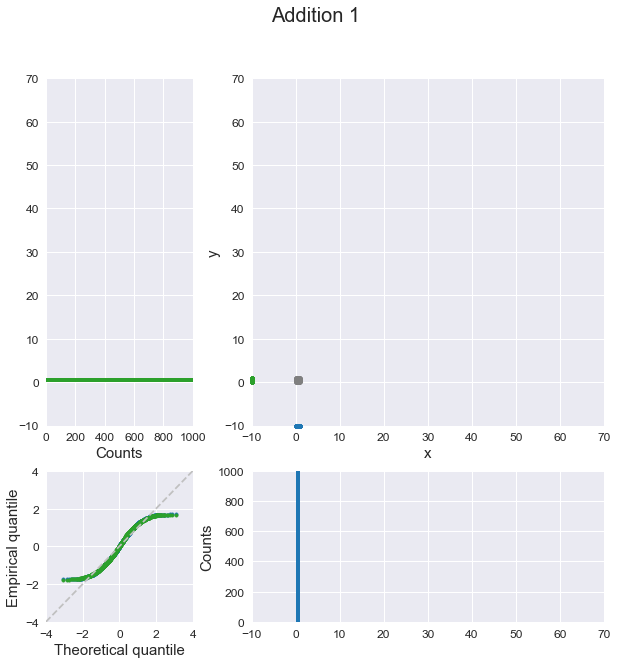

In [7]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)

def roundup(x):
    """Round up float to nearest multiples of 10"""
    return int(ceil(x / 10.0)) * 10

# Make sure upper bound of plot is large enough to
# contain all Gaussian points after all additions
max_xy = roundup(n_additions/2 + 4*sqrt(n_additions/12)) # Gaussian mean + 4*std

# x-y plane of samples
xy_ax = fig.add_subplot(grid[:2, 1:])
xy_ax.set_xlim(-10, max_xy)
xy_ax.set_ylim(-10, max_xy)
xy_ax.set_xticks(np.arange(-10, max_xy+1, 10))
xy_ax.set_yticks(np.arange(-10, max_xy+1, 10))
xy_ax.set_xlabel('x')
xy_ax.set_ylabel('y')

# Hitograms of sampled x and y
x_ax = fig.add_subplot(grid[2, 1:], sharex=xy_ax)
x_ax.set_ylim(0, n_points)
x_ax.set_ylabel('Counts')

# Histogram of sampled y
y_ax = fig.add_subplot(grid[:2, 0], sharey=xy_ax)
y_ax.set_xlim(0, n_points)
y_ax.set_xticks(range(0, n_points+1, 200))
y_ax.set_xlabel('Counts')

# QQ plot for samples of x and y coordinates
qq_ax = fig.add_subplot(grid[2, 0])
qq_ax.set_xlim(-4, 4)
qq_ax.set_xticks(range(-4, 5, 2))
qq_ax.set_ylim(-4, 4)
qq_ax.set_yticks(range(-4, 5, 2))
qq_ax.set_xlabel('Theoretical quantile', fontsize=15)
qq_ax.set_ylabel('Empirical quantile', fontsize=15)
qq_ax.plot([-4, 4], [-4, 4], '--', color='silver')

anim = FuncAnimation(fig, lambda i: update(i, fig, xy_ax, x_ax, y_ax, qq_ax, max_xy, verbose=True), 
                     frames=range(len(sum1s)), interval=100)
anim.save('../viz/clt.mp4', writer='ffmpeg')
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

## Rescale Gaussian samples

Self-contained example

In [8]:
gaussian_mean = n_additions / 2
gaussian_std = sqrt(n_additions / 12)
normalized_gaussians = (gaussians - gaussian_mean) / gaussian_std

Plot Gaussian samples before and after rescaling

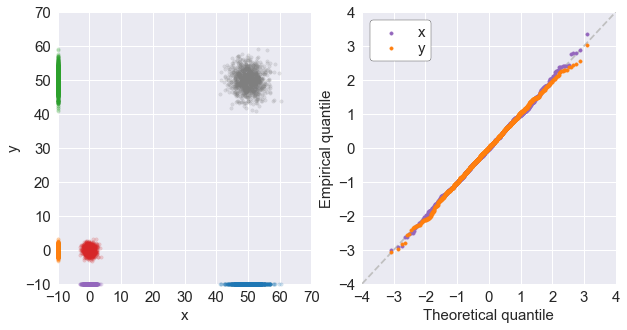

In [9]:
fig, (ax, ax_qq) = plt.subplots(1, 2, figsize=(10, 5))

ax.set_xlim(-max_xy, max_xy)
ax.set_ylim(-max_xy, max_xy)
ax.set_xticks(np.arange(-max_xy, max_xy+1, 10))
ax.set_yticks(np.arange(-max_xy, max_xy+1, 10))

# Final unscaled coordinates = last row of cum sum matrix (additions x number of points)
unscaled1s, unscaled2s = sum1s[-1], sum2s[-1]
scaled1s, scaled2s = (sum1s[-1]-n_additions/2) / sqrt(n_additions/12), (sum2s[-1]-n_additions/2) / sqrt(n_additions/12)
ax.scatter(unscaled1s, unscaled2s, marker='.',  color='tab:gray', alpha=0.2)
ax.scatter(scaled1s, scaled2s, marker='.', color='tab:red', alpha=0.2)
# Plot x and y coordinates on side of xy plane
ax.scatter(unscaled1s, [-10] * len(unscaled1s), color='tab:blue', clip_on=False, marker='.', alpha=0.2)
ax.scatter([-10] * len(unscaled2s), unscaled2s, color='tab:green', clip_on=False, marker='.', alpha=0.2)
ax.scatter(scaled1s, [-10] * len(scaled1s), color='tab:purple', clip_on=False, marker='.', alpha=0.2)
ax.scatter([-10] * len(scaled2s), scaled2s, color='tab:orange', clip_on=False, marker='.', alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-10, max_xy)
ax.set_ylim(-10, max_xy)

# QQ-plot for scaled Gaussians
ax_qq.plot([-4, 4], [-4, 4], '--', color='silver', zorder=10)
plot_qq(ax_qq, scaled1s, color='tab:purple', marker='.', zorder=11, label='x')
plot_qq(ax_qq, scaled2s, color='tab:orange', marker='.', zorder=11, label='y')
ax_qq.set_xlim(-4, 4)
ax_qq.set_xticks(range(-4, 5))
ax_qq.set_ylim(-4, 4)
ax_qq.set_yticks(range(-4, 5))
ax_qq.set_xlabel('Theoretical quantile')
ax_qq.set_ylabel('Empirical quantile')
ax_qq.legend(**legend_opts)

savefig(fig, 'clt_scaling.png')

# Scaling

Self-contained example

Cholesky

In [10]:
M = np.array([[4, 2], [2, 3]])
A = np.linalg.cholesky(M)
A

array([[2.        , 0.        ],
       [1.        , 1.41421356]])

In [11]:
A @ A.T

array([[4., 2.],
       [2., 3.]])

In [12]:
b = np.array([7, 9])
z = np.array([0.276, -0.394])
transformed_z = A @ z + b

In [13]:
transformed_z

array([7.552     , 8.71879986])

SVD

In [14]:
M = np.array([[4, 2], [2, 3]])
U, S, V = np.linalg.svd(M)
A = U @ np.diag(S)**(1/2)
A

array([[-1.85882053, -0.73809637],
       [-1.45132321,  0.94533641]])

In [15]:
A @ A.T

array([[4., 2.],
       [2., 3.]])

In [16]:
b = np.array([7, 9])
z = np.array([0.276, -0.394])
transformed_z = A @ z + b

In [17]:
transformed_z

array([6.7777755 , 8.22697225])

Compare Cholesky and SVD

In [23]:
mean1, mean2, var1, var2, cov = 7, 9, 4, 3, 2
cov_mat = np.array([[var1, cov], [cov, var2]])
A_cholesky = np.linalg.cholesky(M)

In [24]:
transformed1s_cholesky, transformed2s_cholesky = np.array([mean1, mean2])[:, np.newaxis] + A_cholesky @ np.vstack([scaled1s, scaled2s])

In [25]:
U, S, V = np.linalg.svd(cov_mat)
A_svd = U @ np.diag(S)**(1/2)

In [26]:
transformed1s_svd, transformed2s_svd = np.array([mean1, mean2])[:, np.newaxis] + A_svd @ np.array([scaled1s, scaled2s])

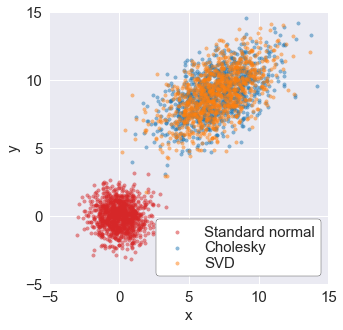

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(scaled1s, scaled2s, marker='.', color='tab:red', alpha=0.5, label='Standard normal')
ax.scatter(transformed1s_cholesky, transformed2s_cholesky, marker='.', color='tab:blue', alpha=0.5, label='Cholesky')
ax.scatter(transformed1s_svd, transformed2s_svd, marker='.', color='tab:orange', alpha=0.5, label='SVD')
ax.legend(**legend_opts)

ax.set_xlim(-5, 15)
ax.set_ylim(-5, 15)
ax.set_yticks(range(-5, 16, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
savefig(fig, 'cholesky_vs_svd.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e503c8f-0965-423a-a3ea-3c5fc4b3d7b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>